In [1]:
from pathlib import Path
import pickle, gzip, math, os, time, shutil, matplotlib as mpl, matplotlib.pyplot as plt

In [2]:
MNIST_URL = 'https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
path_data = Path('../data')
path_data.mkdir(exist_ok=True)
path_gz = path_data/'mnist.pkl.gz'

In [3]:
from urllib.request import urlretrieve
if not path_gz.exists(): 
    urlretrieve(MNIST_URL, path_gz)

In [6]:
!ls -l {path_data}

total 16656
-rw-rw-r-- 1 pico pico 17051982 Oct 26 17:01 mnist.pkl.gz


In [7]:
with gzip.open(path_gz, 'rb') as f:
    ((x_train, y_train), (x_valid,y_valid), _) = pickle.load(f,encoding='latin-1')

In [8]:
lst1 = list(x_train[0])
vals = lst1[200:210]
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [9]:
def chunks(x, sz):
    for i in range(0,len(x),sz):
        yield x[i:i+sz]

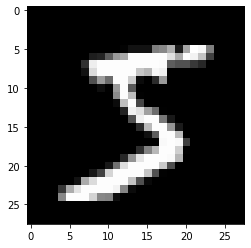

In [10]:
mpl.rcParams['image.cmap'] = 'gray'
plt.imshow(list(chunks(lst1,28)))

In [11]:
from itertools import islice

In [12]:
it = iter(vals)

In [13]:
ii= islice(it,5)

In [19]:
next(ii)

StopIteration: 

In [20]:
def f(): return list(islice(it,28))

In [21]:
it = iter(lst1)

In [ ]:
f()

In [34]:
it = iter(lst1)
img = list(iter(lambda : list(islice(it,28)),[]))

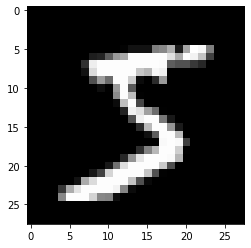

In [36]:
plt.imshow(img)

## Matrix and tensor

In [40]:
img[20][15] 

0.98828125

In [41]:
class Matrix:
    def __init__(self,xs):
        self.xs = xs
    def __getitem__(self, idxs): 
        return self.xs[idxs[0]][idxs[1]]

In [43]:
m = Matrix(img)
m[20,15]

0.98828125

In [44]:
import torch
from torch import tensor

In [45]:
tensor([1,2,3])

tensor([1, 2, 3])

In [46]:
tens = tensor(img)

In [47]:
tens[20,15]

tensor(0.9883)

In [50]:
#convert lists into tensors
x_train, y_train,x_valid,y_valid = map(tensor,(x_train, y_train,x_valid,y_valid))
x_train.shape

<ipython-input-50-66145db8fb92>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train, y_train,x_valid,y_valid = map(tensor,(x_train, y_train,x_valid,y_valid))


torch.Size([50000, 784])

In [51]:
imgs = x_train.reshape(-1,28,28)
imgs.shape

torch.Size([50000, 28, 28])

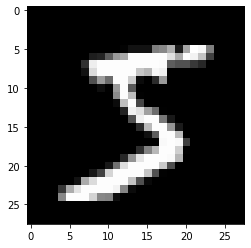

In [52]:
plt.imshow(imgs[0])

In [53]:
imgs[0,20,15]

tensor(0.9883)

In [54]:
x_train.shape

torch.Size([50000, 784])

In [55]:
n,c = x_train.shape

In [56]:
y_train, y_train.shape

(tensor([5, 0, 4,  ..., 8, 4, 8]), torch.Size([50000]))

In [58]:
n

50000

In [59]:
min(y_train), max(y_train)

(tensor(0), tensor(9))

In [60]:
y_train.min() , y_train.max()

(tensor(0), tensor(9))

## Random numbers 

In [61]:
rnd_state = None
def seed(a):
    global rnd_state
    a, x = divmod(a, 30268)
    a, y = divmod(a, 30306)
    a, z = divmod(a, 30322)
    rnd_state = int(x)+1, int(y)+1, int(z)+1

In [62]:
seed(340570)
rnd_state

(7623, 12, 1)

In [63]:
def rand():
    global rnd_state
    x, y, z = rnd_state
    x = (171 * x) % 30269
    y = (172 * y) % 30307
    z = (170 * z) % 30323
    rnd_state = x,y,z
    return (x/30269 + y/30307 + z/30323) % 1.0

In [64]:
rand(), rand(), rand()

(0.13866032384694274, 0.7734121508792164, 0.014135376180295145)

In [65]:
%timeit -n 10 list(chunks([rand() for _ in range(7840)],10))

3.17 ms ± 235 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [66]:
%timeit -n 10 torch.randn(784,10)

The slowest run took 15.55 times longer than the fastest. This could mean that an intermediate result is being cached.
260 µs ± 405 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [67]:
torch.cuda.is_available()

True